In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json


## EDA

In [56]:
def convert_salary(salary):
    salary_dict = json.loads(salary)
    if salary_dict['currency'] == 'RUR':
        if salary_dict['to'] is not None and salary_dict['from'] is not None:
            return (salary_dict['to'] + salary_dict['from']) / 2
        elif salary_dict['to'] is not None:
            return salary_dict['to']
        elif salary_dict['from'] is not None:
            return salary_dict['from']
        else:
            return None
    else:
        return None

In [57]:
filename = 'Result_19.csv'

# Чтение файла CSV с помощью pandas
df = pd.read_csv(filename)
df.drop_duplicates(inplace=True)
df_hh = df[['name', 'description', 'employer_name', 'salary', 'schedule', 'key_skills', 'experience', 'employment', 'region_name']]
df_hh = df_hh.dropna(subset=['salary']).reset_index(drop=True)
# Применение регулярного выражения к колонке 'description' и удаление HTML-тегов
df_hh['description'] = df_hh['description'].str.replace('<.*?>', '', regex=True)

# Группировка значений по валютам и подсчет их количества
currency_counts = df_hh['salary'].apply(lambda x: json.loads(x)['currency']).value_counts()

# Вывод распределения валют
print(currency_counts)

# Применение функции convert_salary() к столбцу 'salary'
df_hh['salary'] = df_hh['salary'].apply(convert_salary)

# Удаление значений, валюта которых не равна 'RUR'
df_hh = df_hh[df_hh['salary'].notnull()]

salary
RUR    74501
USD      591
EUR      160
KZT        6
KGS        2
Name: count, dtype: int64


In [58]:

key_skills_list = df_hh['key_skills'].dropna().tolist()

all_skills = []
for skills in key_skills_list:
    skills = skills.strip("{}")
    skills = skills.split(",")
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

sorted_skill_counts = sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)

skills_to_keep = [skill for skill, count in sorted_skill_counts if count >= 25]

df_hh['key_skills'] = df_hh['key_skills'].apply(lambda x: ','.join([skill for skill in str(x).strip("{}").split(",") if skill in skills_to_keep]))

df_hh = df_hh[df_hh['key_skills'] != '']  # Отфильтровать строки, где нет навыков

df_hh



name  \
0                               PHP-разработчик (Middle)   
1              Руководитель отдела продаж (Дистрибьюция)   
2                            Ведущий инженер-программист   
4                                         Программист С#   
5                                         Data Scientist   
...                                                  ...   
75255                        Руководитель отдела закупок   
75256                                 Системный аналитик   
75257  Руководитель отдела по работе с блогерами / Ме...   
75258                         Руководитель отдела продаж   
75259                                Инженер-программист   

                                             description  \
0      Дром даёт возможность вместе с сильной командо...   
1      Компания &quot;АКВАСТОК&quot; - отечественный ...   
2      Приглашаем на работу ВЕДУЩЕГО ИНЖЕНЕРА-ПРОГРАМ...   
4      COMITAS — первый системный интегратор междунар...   
5      Ищем специалиста по Data Science, чтобы строит...   
...                                                  ...   
75255  Развивающаяся сеть пунктов замены масла &quot;...   
75256  Мы ищем аналитика/системного аналитика, которы...   
75257  Наш идеальный кандидат — это influence-маркето...   
75258  Юридическая компания &quot;ФИНАНСОВАЯ ГИЛЬДИЯ&...   
75259  Обязанности:   Разрабатывать и внедрять систем...   

                                           employer_name    salary schedule  \
0                                                   Дром  180000.0  fullDay   
1                                               АКВАСТОК  240000.0  fullDay   
2                                    Энергокабель, Завод  146500.0  fullDay   
4                                                КОМИТАС  155000.0  fullDay   
5                                                  Точка  380000.0  fullDay   
...                                                  ...       ...      ...   
75255                                         Ойл Мастер  100000.0  fullDay   
75256  Отраслевой центр разработки и внедрения информ...  136000.0  fullDay   
75257            Юридическое агентство Афонин и Партнеры   85000.0  fullDay   
75258                                 Финансовая Гильдия  100000.0  fullDay   
75259                  Областная клиническая больница №1   60000.0  fullDay   

                                              key_skills    experience  \
0                     PHP,ООП,Веб-программирование,MySQL  between3And6   
1      Активные продажи,Поиск и привлечение клиентов,...  between3And6   
2               Python,MS SQL,SQL,MS Visual Studio,C/C++  between1And3   
4             АСУ ТП,C#,C++,Автоматизация,HMI,PostgreSQL  between1And3   
5      SQL,Python,Информационные технологии,Работа с ...  between3And6   
...                                                  ...           ...   
75255  Закупки,1С: Предприятие,Альфа-Авто,Конкурентна...  between3And6   
75256                 SQL,PostgreSQL,HTTP,REST,SOAP,BPMN  between3And6   
75257  Анализ данных,Анализ бизнес показателей,Социал...  between1And3   
75258  Грамотная речь,Грамотность,Телефонные перегово...  between1And3   
75259  Разработка инструкций,Разработка технических з...  between3And6   

      employment              region_name  
0           full          Томская область  
1           full                   Москва  
2           full       Московская область  
4           full                   Москва  
5           full                   Москва  
...          ...                      ...  
75255       full                   Москва  
75256       full    Новосибирская область  
75257       full  Республика Башкортостан  
75258       full                   Москва  
75259       full        Тюменская область  

[60648 rows x 9 columns]

In [59]:
skills_set = set()
for skills in df_hh['key_skills']:
    if isinstance(skills, str):
        skills = skills.strip("{}").split(",")
        skills_set.update(skills)

total_skills = len(skills_set)
print("Общее количество навыков:", total_skills)
df_hh = df_hh.reset_index(drop=True)


Общее количество навыков: 1599


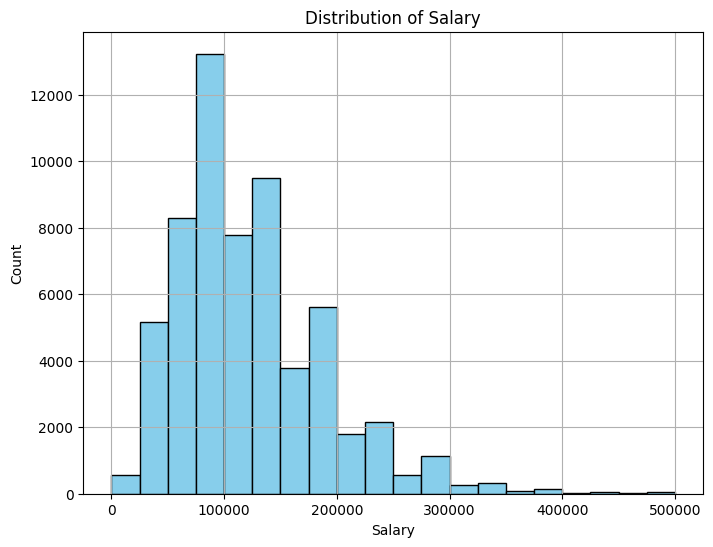

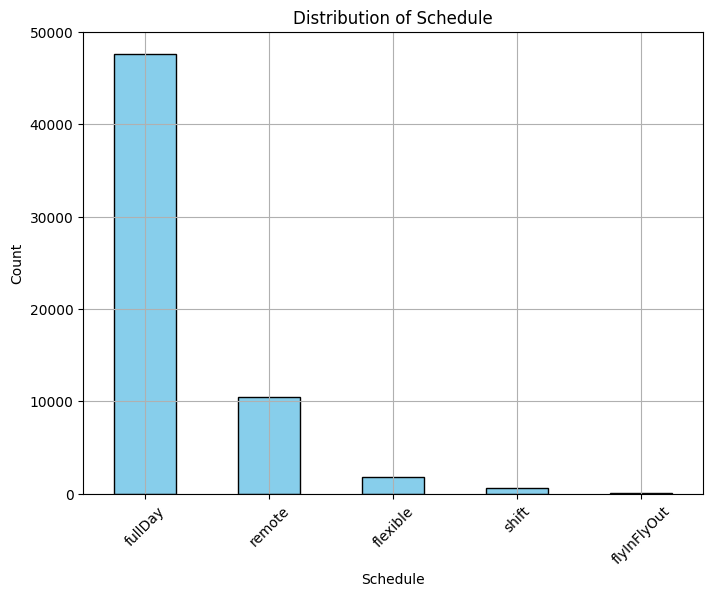

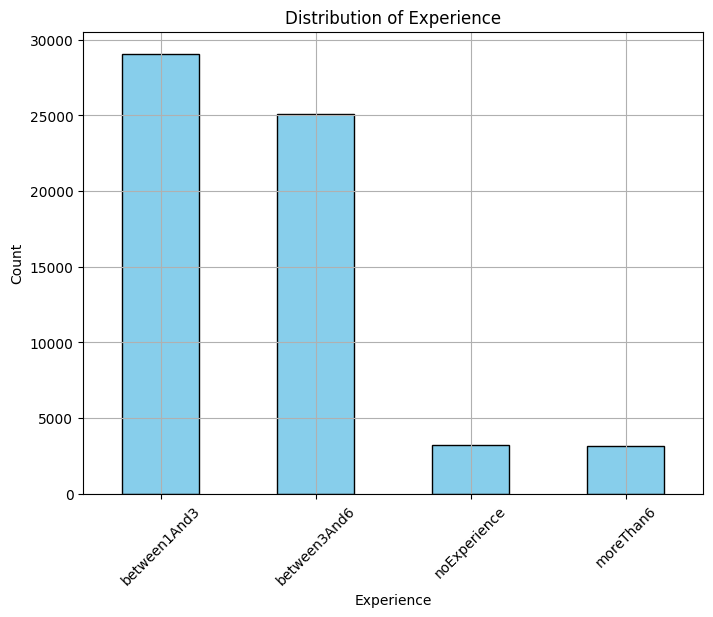

                              name  \
count                        60551   
unique                       17085   
top     Руководитель отдела продаж   
freq                          5372   
mean                           NaN   
std                            NaN   
min                            NaN   
25%                            NaN   
50%                            NaN   
75%                            NaN   
max                            NaN   

                                              description employer_name  \
count                                               60551         60551   
unique                                              45515         19012   
top     Обязанности:  Разрабатывать на платформе &quot...    Первый Бит   
freq                                                   27           271   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min               

In [60]:
threshold = 500000  # Определяем пороговое значение

df_hh = df_hh[df_hh['salary'] <= threshold]

# Статистика по столбцам
column_stats = df_hh.describe(include='all')

# График распределения зарплаты
plt.figure(figsize=(8, 6))
plt.hist(df_hh['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.grid(True)
plt.show()

# График распределения графика работы
plt.figure(figsize=(8, 6))
df_hh['schedule'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Schedule')
plt.ylabel('Count')
plt.title('Distribution of Schedule')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# График распределения опыта работы
plt.figure(figsize=(8, 6))
df_hh['experience'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Distribution of Experience')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# График распределения типа занятости
plt.figure(figsize=(8, 6))
df_hh['employment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.title('Distribution of Employment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# График распределения региона
plt.figure(figsize=(12, 6))
df_hh['region_name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Вывод статистики по столбцам
print(column_stats)


In [61]:
import pandas as pd

skills_list = df_hh['key_skills'].tolist()

# Получаем уникальные навыки из списка
unique_skills = sorted(set(','.join(skills_list).split(',')))

# Создаем пустой датафрейм с колонками, соответствующими навыкам
skills_df = pd.DataFrame(columns=unique_skills)

# Заполняем датафрейм значениями 1 или 0, в зависимости от наличия навыка в каждом элементе списка
for skill in unique_skills:
    row = [1 if skill in skills.split(',') else 0 for skills in skills_list]
    skills_df[skill] = row
df_hh = df_hh.reset_index(drop=True)


In [62]:
from sklearn.preprocessing import LabelEncoder

# Закодируйте категориальные признаки
encoder = LabelEncoder()
encoded_columns = ['schedule', 'experience', 'employment', 'region_name']
for column in encoded_columns:
    df_hh[column] = encoder.fit_transform(df_hh[column])
    mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    print(mapping)

df_hh_result = df_hh.merge(skills_df, left_index=True, right_index=True).drop(['name', 'description', 'employer_name', 'key_skills', ''], axis=1)


{'flexible': 0, 'flyInFlyOut': 1, 'fullDay': 2, 'remote': 3, 'shift': 4}
{'between1And3': 0, 'between3And6': 1, 'moreThan6': 2, 'noExperience': 3}
{'full': 0, 'part': 1, 'probation': 2, 'project': 3}
{'Калининградская область': 0, 'Ленинградская область': 1, 'Москва': 2, 'Московская область': 3, 'Новосибирская область': 4, 'Пензенская область': 5, 'Псковская область': 6, 'Республика Башкортостан': 7, 'Республика Татарстан': 8, 'Санкт-Петербург': 9, 'Томская область': 10, 'Тюменская область': 11}


{'flexible': 0, 'flyInFlyOut': 1, 'fullDay': 2, 'remote': 3, 'shift': 4}
{'between1And3': 0, 'between3And6': 1, 'moreThan6': 2, 'noExperience': 3}
{'full': 0, 'part': 1, 'probation': 2, 'project': 3}
{'Калининградская область': 0, 'Ленинградская область': 1, 'Москва': 2, 'Московская область': 3, 'Новосибирская область': 4, 'Пензенская область': 5, 'Псковская область': 6, 'Республика Башкортостан': 7, 'Республика Татарстан': 8, 'Санкт-Петербург': 9, 'Томская область': 10, 'Тюменская область': 11}

In [65]:
df_hh_result.to_csv('df_hh_res.csv', index=False)

## Model Train

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor


In [19]:
df_hh_res = pd.read_csv('df_hh_res.csv')


In [20]:
df_hh_res = df_hh_res.drop_duplicates().reset_index(drop=True)

In [21]:
# Combine the TF-IDF matrix with other feature columns
X = df_hh_res.drop(['salary'], axis=1)
y = df_hh_res['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [42]:
from sklearn.model_selection import GridSearchCV

# Определение набора гиперпараметров для перебора
param_grid = {
    'depth': [4, 6, 8, 10, 20],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Создание модели CatBoostRegressor
model = CatBoostRegressor()

# Подбор гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Наилучшие значения гиперпараметров
best_params = grid_search.best_params_

0:	learn: 66636.7696630	total: 9.59ms	remaining: 9.58s
1:	learn: 65477.4764954	total: 19.3ms	remaining: 9.63s
2:	learn: 64542.6458921	total: 28.8ms	remaining: 9.58s
3:	learn: 63761.5235900	total: 39.3ms	remaining: 9.77s
4:	learn: 63117.3752399	total: 49.3ms	remaining: 9.82s
5:	learn: 62563.2781524	total: 59.3ms	remaining: 9.83s
6:	learn: 62119.8795676	total: 69.8ms	remaining: 9.9s
7:	learn: 61807.3692990	total: 78.4ms	remaining: 9.71s
8:	learn: 61494.5927910	total: 88.1ms	remaining: 9.7s
9:	learn: 61119.4566497	total: 97.2ms	remaining: 9.62s
10:	learn: 60845.7386691	total: 106ms	remaining: 9.57s
11:	learn: 60603.4735200	total: 115ms	remaining: 9.48s
12:	learn: 60357.7542349	total: 124ms	remaining: 9.41s
13:	learn: 60068.2915052	total: 134ms	remaining: 9.43s
14:	learn: 59867.3899218	total: 146ms	remaining: 9.57s
15:	learn: 59672.7957744	total: 157ms	remaining: 9.63s
16:	learn: 59470.9346266	total: 168ms	remaining: 9.69s
17:	learn: 59319.0561018	total: 179ms	remaining: 9.76s
18:	learn: 5

d:\work\shpad\.venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\work\shpad\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\work\shpad\.venv\lib\site-packages\catboost\core.py", line 5734, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "d:\work\shpad\.venv\lib\site-packages\catboost\core.py", line 2341, in _fit
    train_params = sel

0:	learn: 66280.4381033	total: 61.5ms	remaining: 1m 1s
1:	learn: 64910.8822197	total: 120ms	remaining: 1m
2:	learn: 63659.5080467	total: 173ms	remaining: 57.6s
3:	learn: 62576.1743393	total: 226ms	remaining: 56.3s
4:	learn: 61626.3213747	total: 280ms	remaining: 55.6s
5:	learn: 60871.4183305	total: 346ms	remaining: 57.3s
6:	learn: 60188.0299588	total: 402ms	remaining: 57s
7:	learn: 59620.0414805	total: 457ms	remaining: 56.7s
8:	learn: 59125.7937628	total: 519ms	remaining: 57.1s
9:	learn: 58682.6141861	total: 602ms	remaining: 59.6s
10:	learn: 58317.5410137	total: 658ms	remaining: 59.2s
11:	learn: 58000.5251364	total: 716ms	remaining: 58.9s
12:	learn: 57695.0336828	total: 782ms	remaining: 59.4s
13:	learn: 57432.6454131	total: 839ms	remaining: 59.1s
14:	learn: 57168.2758696	total: 938ms	remaining: 1m 1s
15:	learn: 56947.7206200	total: 1.03s	remaining: 1m 3s
16:	learn: 56760.5864283	total: 1.09s	remaining: 1m 3s
17:	learn: 56580.0669374	total: 1.15s	remaining: 1m 2s
18:	learn: 56378.9473105

In [43]:
best_params

{'depth': 10, 'learning_rate': 0.1}

In [45]:
model = CatBoostRegressor(depth=10, learning_rate=0.1, n_estimators=10000)
model.fit(X_train, y_train)


0:	learn: 66280.4381033	total: 48.1ms	remaining: 8m
1:	learn: 64910.8822197	total: 105ms	remaining: 8m 43s
2:	learn: 63659.5080467	total: 171ms	remaining: 9m 30s
3:	learn: 62576.1743393	total: 219ms	remaining: 9m 7s
4:	learn: 61626.3213747	total: 272ms	remaining: 9m 4s
5:	learn: 60871.4183305	total: 330ms	remaining: 9m 9s
6:	learn: 60188.0299588	total: 378ms	remaining: 8m 59s
7:	learn: 59620.0414805	total: 427ms	remaining: 8m 53s
8:	learn: 59125.7937628	total: 495ms	remaining: 9m 9s
9:	learn: 58682.6141861	total: 570ms	remaining: 9m 28s
10:	learn: 58317.5410137	total: 632ms	remaining: 9m 33s
11:	learn: 58000.5251364	total: 693ms	remaining: 9m 37s
12:	learn: 57695.0336828	total: 749ms	remaining: 9m 35s
13:	learn: 57432.6454131	total: 796ms	remaining: 9m 27s
14:	learn: 57168.2758696	total: 862ms	remaining: 9m 33s
15:	learn: 56947.7206200	total: 960ms	remaining: 9m 59s
16:	learn: 56760.5864283	total: 1.03s	remaining: 10m 4s
17:	learn: 56580.0669374	total: 1.08s	remaining: 10m 1s
18:	learn

In [46]:
from sklearn.metrics import mean_squared_error

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности модели на тестовой выборке
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2503964657.362611
50039.63086756947


In [49]:
import matplotlib.pyplot as plt

# Загрузка данных об ошибке обучения из файла
train_error = pd.read_csv('catboost_info/learn_error.tsv', sep='\t')

# Построение графика ошибки обучения
plt.plot(train_error['iter'], train_error['RMSE'])
plt.xlabel('Iteration')
plt.ylabel('Training Error')
plt.title('Training Error vs. Iteration')
plt.show()


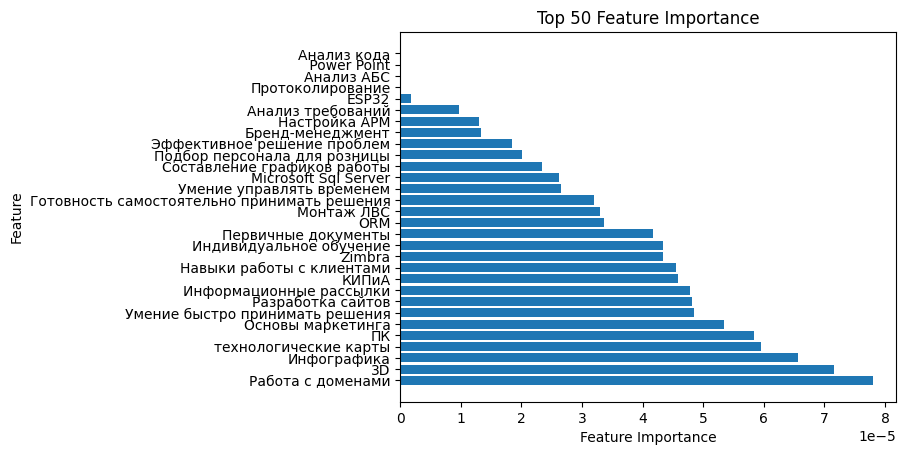

In [168]:
# Получение важности признаков из обученной модели
feature_importance = model.feature_importances_

# Создание DataFrame с важностью признаков
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Сортировка признаков по их важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 50  # Количество наиболее важных признаков, которые нужно отобразить

plt.barh(importance_df['Feature'][-top_n:-20], importance_df['Importance'][-top_n:-20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()

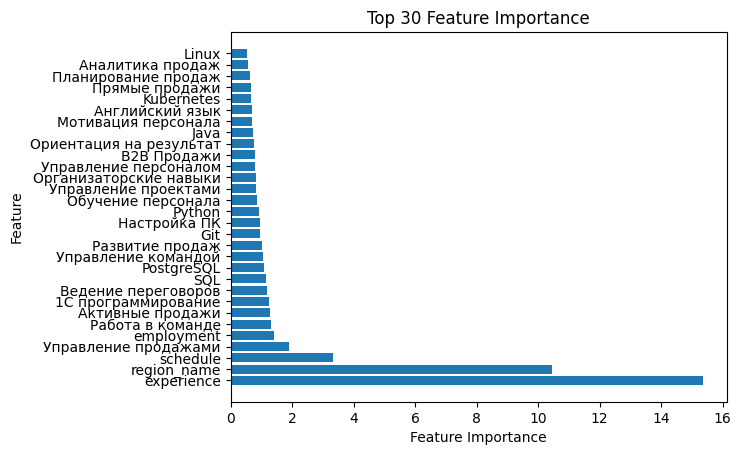

In [53]:
# Получение важности признаков из обученной модели
feature_importance = model.feature_importances_

# Создание DataFrame с важностью признаков
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Сортировка признаков по их важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 30  # Количество наиболее важных признаков, которые нужно отобразить

plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()




In [54]:
# Получение прогнозируемых значений на обучающей выборке
y_train_pred = model.predict(X_train)

# Получение прогнозируемых значений на тестовой выборке
y_test_pred = model.predict(X_test)


In [63]:

# Получение индексов, которые отсортируют y_test от меньшего к большему
sorted_indexes = np.argsort(y_test)

# Сортировка y_test и y_test_pred
sorted_y_test = y_test.iloc[sorted_indexes]
sorted_y_test_pred = y_test_pred[sorted_indexes]

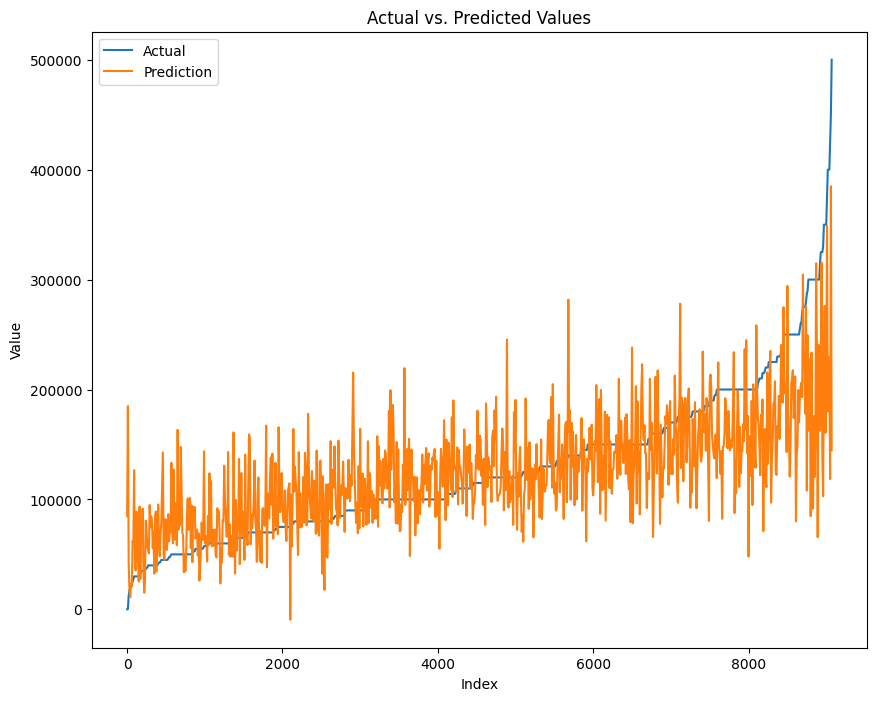

In [64]:
N = 10  # Отображать каждый N-й элемент
plt.figure(figsize=(10, 8))  # Установка размера графика (10 дюймов по ширине, 8 дюймов по высоте)

# Создание индексов для отображения каждого N-го элемента
indexes = range(0, len(sorted_y_test), N)

# Отображение только каждого N-го элемента на графике
plt.plot(indexes, sorted_y_test.iloc[indexes], label='Actual')
plt.plot(indexes, sorted_y_test_pred[indexes], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


Мы видим, что модель слабо предсказывает дисперсию, но довольно неплохо предсказывает мат ожидание. Для большей интерпретации модели, добавим классификацию, поделив сбалансированно классы по зарплате. Эвристическими методами, был выбран порог 125000 рублей.

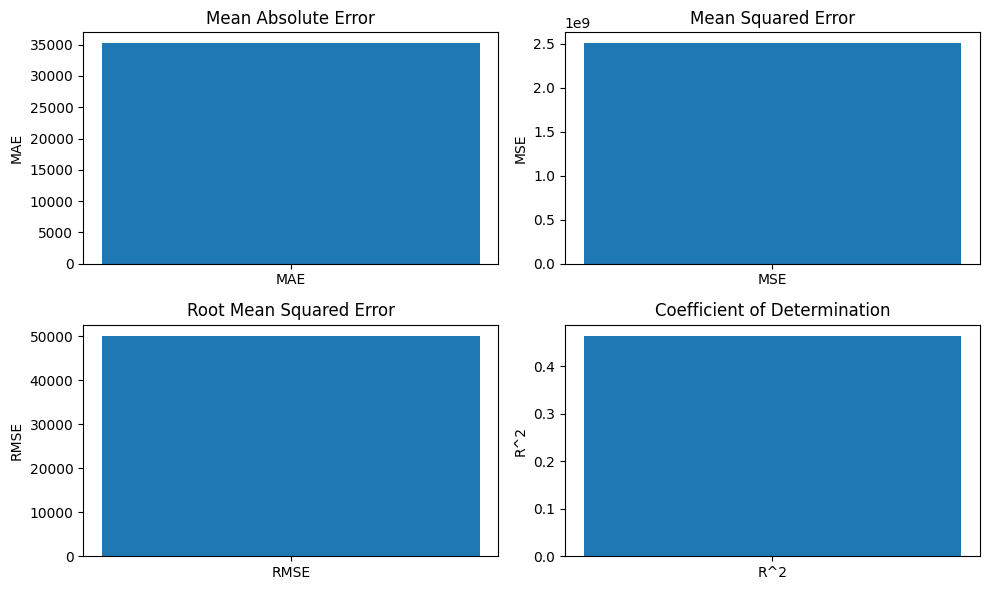

F1 Score: 0.7311355311355311
Mean Absolute Error (MAE): 35202.7891168296
Mean Squared Error (MSE): 2503964657.362611
Root Mean Squared Error (RMSE): 50039.63086756947
Coefficient of Determination (R^2): 0.4645489140419171
F1 Score: 0.7311355311355311


In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score

# Вычисление прогнозируемых значений
y_pred = model.predict(X_test)

# Расчет метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вычисление F-меры
threshold = 125000  # Пороговое значение для классификации
y_pred_binary = np.where(y_pred > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

f1 = f1_score(y_test_binary, y_pred_binary)

# Построение графиков
plt.figure(figsize=(10, 6))

# График средней абсолютной ошибки (MAE)
plt.subplot(2, 2, 1)
plt.bar(['MAE'], [mae])
plt.ylabel('MAE')
plt.title('Mean Absolute Error')

# График средней квадратичной ошибки (MSE)
plt.subplot(2, 2, 2)
plt.bar(['MSE'], [mse])
plt.ylabel('MSE')
plt.title('Mean Squared Error')

# График корня из средней квадратичной ошибки (RMSE)
plt.subplot(2, 2, 3)
plt.bar(['RMSE'], [rmse])
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error')

# График коэффициента детерминации (R^2)
plt.subplot(2, 2, 4)
plt.bar(['R^2'], [r2])
plt.ylabel('R^2')
plt.title('Coefficient of Determination')

plt.tight_layout()
plt.show()

# Вывод значения F-меры
print('F1 Score:', f1)
# Вывод значений метрик
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Coefficient of Determination (R^2):', r2)
print('F1 Score:', f1)


F1 Score равен 0.731, что указывает на хорошую сбалансированность между точностью и полнотой модели в классификации.
Средняя абсолютная ошибка (MAE) составляет 35202.789, что означает, что средняя абсолютная разница между прогнозируемыми и фактическими значениями составляет примерно 35202.789.
Средняя квадратичная ошибка (MSE) равна 2503964657.362, что представляет собой среднюю квадратичную разницу между прогнозируемыми и фактическими значениями.
Корень из средней квадратичной ошибки (RMSE) составляет 50039.631, что является среднеквадратическим отклонением прогнозируемых значений от фактических значений.
Коэффициент детерминации (R^2) равен 0.465, что означает, что модель объясняет примерно 46.5% дисперсии в данных.
Общий вывод: Модель имеет хороший F1 Score и может достаточно точно предсказывать целевую переменную. Однако значения MAE, MSE и RMSE указывают на то, что существует разница между прогнозируемыми и фактическими значениями, и модель может быть дополнительно улучшена. Коэффициент детерминации (R^2) показывает, что модель объясняет менее половины дисперсии в данных, поэтому возможно есть другие факторы, которые не были учтены в модели и влияют на целевую переменную.

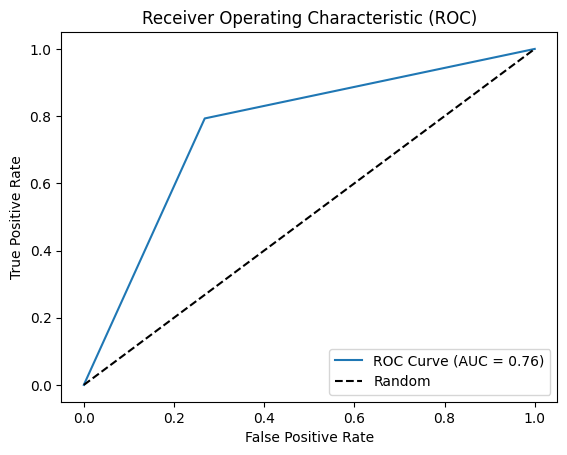

In [74]:
from sklearn.metrics import roc_curve, auc

# Предполагаем, что у вас есть фактические бинарные значения y_test_binary и прогнозируемые значения y_pred_proba
# y_test_binary - фактические значения (0 или 1)
# y_pred_proba - вероятности принадлежности к классу 1

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [81]:
# Определение границ диапазонов для каждого класса
class_boundaries = np.linspace(y_test.min(), y_test.max(), num=6)

# Разделение значений y_test на 5 классов с равным диапазоном
y_test_classes = np.digitize(y_test, class_boundaries)
y_pred_classes = np.digitize(y_pred, class_boundaries)

In [85]:
# Сохранение модели CatBoost
model.save_model('catboost_model.cbm')

# Получение параметров модели
model_params = model.get_params()

# Сохранение параметров модели в файл
with open('catboost_model_params.txt', 'w') as file:
    for param, value in model_params.items():
        file.write(f'{param}: {value}\n')

## inference

In [172]:
from catboost import CatBoost


# Запись названий колонок в файл
#with open('column_names.txt', 'w') as file:
#    file.write('\n'.join(df_hh_res.columns[1:]))

# Чтение названий колонок из файла
with open('column_names.txt', 'r') as file:
    column_names = file.read().splitlines()


# Путь к модели CatBoost
model_path = 'catboost_model.cbm'
# Переменная skills (пример)
skills = ['Python', 'SQL', 'PyTorch', 'NLP', 'Git', 'Docker','Linux', 'C++']

# Создание вектора для хранения результатов
skills_vector = []

# Проверка наличия названий колонок в массиве skills
for column in column_names:
    if column in skills:
        skills_vector.append(1)
    else:
        skills_vector.append(0)
        
# Маппинг переменных к соответствующим числовым значениям
variable_1_mapping = {'flexible': 0, 'flyInFlyOut': 1, 'fullDay': 2, 'remote': 3, 'shift': 4}
variable_2_mapping = {'between1And3': 0, 'between3And6': 1, 'moreThan6': 2, 'noExperience': 3}
variable_3_mapping = {'full': 0, 'part': 1, 'probation': 2, 'project': 3}
variable_4_mapping = {'Калининградская область': 0, 'Ленинградская область': 1, 'Москва': 2, 'Московская область': 3,
                      'Новосибирская область': 4, 'Пензенская область': 5, 'Псковская область': 6,
                      'Республика Башкортостан': 7, 'Республика Татарстан': 8, 'Санкт-Петербург': 9,
                      'Томская область': 10, 'Тюменская область': 11}

# Ввод переменных
variable_1 = 'fullDay'
variable_2 = 'between1And3'
variable_3 = 'full'
variable_4 = 'Москва'


#variable_1 = input("Введите значение переменной 1 (flexible, flyInFlyOut, fullDay, remote, shift): ")
#variable_2 = input("Введите значение переменной 2 (between1And3, between3And6, moreThan6, noExperience): ")
#variable_3 = input("Введите значение переменной 3 (full, part, probation, project): ")
#variable_4 = input("Введите значение переменной 4 (Калининградская область, Ленинградская область, Москва, "
#                   "Московская область, Новосибирская область, Пензенская область, Псковская область, "
#                   "Республика Башкортостан, Республика Татарстан, Санкт-Петербург, Томская область, "
#                   "Тюменская область): ")

# Преобразование переменных в числовые значения
variable_1_encoded = variable_1_mapping.get(variable_1)
variable_2_encoded = variable_2_mapping.get(variable_2)
variable_3_encoded = variable_3_mapping.get(variable_3)
variable_4_encoded = variable_4_mapping.get(variable_4)

# Создание вектора переменных
variables_vector = [variable_1_encoded, variable_2_encoded, variable_3_encoded, variable_4_encoded]
res_vector = variables_vector + skills_vector
# Загрузка модели CatBoost
model_res = CatBoost()
model_res.load_model(model_path)

# Прогнозирование на основе вектора переменных
prediction = model_res.predict([res_vector])

# Вывод прогнозируемого значения
print("Прогнозируемое значение:", prediction)


Прогнозируемое значение: [191554.35164246]
